# Spatial dynamics analytics
* Dynamics of spatial autocorrelation 
* Markov-based methods
    * Classic Markov
    * Spatial Markov
    * LISA Markov

In [5]:
import matplotlib
import numpy as np
import pysal as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
pdUS_real = pd.read_csv("data/US_state_pci_constant09_1929_2009.csv")
data_table = ps.pdio.read_files(ps.examples.get_path('us48.shp'))
complete_table = data_table.merge(pdUS_real,left_on='STATE_NAME',right_on='Name')
complete_table.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Unnamed: 0,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,20.750,34.956,1,1,Washington,53,Pacific,WA,<pysal.cg.shapes.Polygon object at 0x7f1bb1cf8...,44,...,39279.457236,38828.653083,38406.773885,38399.791076,39731.934399,39258.183850,40946.131691,42197.181150,41440.039182,40619.0
1,45.132,34.527,2,2,Montana,30,Mtn,MT,<pysal.cg.shapes.Polygon object at 0x7f1bb1cf8...,23,...,28117.802282,29487.632151,29454.415581,30271.870277,31251.533240,31842.212079,32927.598482,33757.124099,33174.550940,32699.0
2,9.571,18.899,3,3,Maine,23,N Eng,ME,<pysal.cg.shapes.Polygon object at 0x7f1bb1cf8...,16,...,31922.657091,32789.878690,33070.180917,33494.589125,34299.798502,33747.010635,34415.310417,34786.651715,34781.812246,35268.0
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,<pysal.cg.shapes.Polygon object at 0x7f1bb1cf8...,31,...,31231.205087,31639.059097,31924.155031,33939.986592,33703.546914,34760.925899,34964.422976,37127.145653,38870.214688,38672.0
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,<pysal.cg.shapes.Polygon object at 0x7f1bb1cf8...,38,...,32535.619948,33350.751818,33065.410778,35062.807957,36076.060376,35949.502622,35458.198611,37247.170983,38052.135623,36499.0


## Dynamics of Spatial Dependence

In [12]:
names = pdUS_real["Name"].values
years = range(1929,2010)
pd_pci_real = pdUS_real[list(map(str,years))]
pd_pci_real.index = names
pd_pci_real.head()

,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Alabama,4052.365556,3430.022695,3161.597895,2536.860876,2739.472462,3378.157239,3398.140803,3874.013453,3977.873542,3712.555177,...,29241.567520,29639.055782,30005.366632,30390.798397,31419.619402,31963.047051,32599.833621,33098.019485,32702.237326,32274.0
Arizona,7527.614035,6680.194012,6055.024539,5026.742847,5082.876615,5795.701045,6514.408175,7130.654245,7508.795000,7272.956454,...,31866.593415,31777.157448,31565.202073,31604.564794,32655.279836,33692.085648,34640.914802,34631.446547,33326.010158,32077.0
Arkansas,3889.267251,2929.008144,3034.569408,2458.562701,2590.946846,2993.911866,3241.544453,3812.276187,3813.991111,3514.755106,...,27729.094129,28506.407024,28536.163830,29235.330098,30056.758629,30221.924956,30904.608219,32148.163855,31686.862700,31493.0
California,12433.109181,11394.869401,10571.592961,9082.588321,9010.554000,9654.165000,10335.359124,11899.858058,11844.230208,11731.065745,...,40210.114257,39672.991248,39234.392996,39410.680092,40503.086453,41153.095909,42746.710084,43398.469152,42226.232096,40902.0
Colorado,7954.178830,7425.292575,6647.824145,5543.510803,5825.504692,5891.762388,6952.877956,8365.399568,7925.950278,7698.987376,...,41049.823537,41463.424257,40502.057426,39749.975022,40366.800376,41070.708428,42207.175069,42593.471680,41570.573113,40093.0


In [13]:
pci_real = pd_pci_real.values.T
pci_real.shape

(81, 48)

Prepare the spatial weight matrix - queen contiguity

In [14]:
w = ps.open(ps.examples.get_path("states48.gal")).read()
w.transform = 'R'

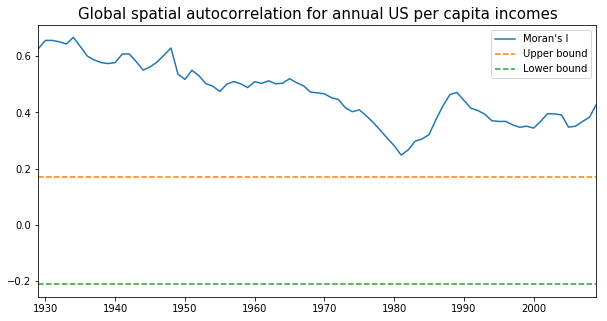

In [15]:
mits = [ps.esda.moran.Moran(cs, w) for cs in pci_real]
res = np.array([(mi.I, mi.EI, mi.seI_norm, mi.sim[974]) for mi in mits])
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (10,5) )
ax.plot(years, res[:,0], label='Moran\'s I')
#plot(years, res[:,1], label='E[I]')
ax.plot(years, res[:,1]+1.96*res[:,2], label='Upper bound',linestyle='dashed')
ax.plot(years, res[:,1]-1.96*res[:,2], label='Lower bound',linestyle='dashed')
ax.set_title("Global spatial autocorrelation for annual US per capita incomes",fontdict={'fontsize':15})
ax.set_xlim([1929,2009])
ax.legend()

## Markov-based methods 
* Role of space in shaping per capita income dynamics

Spatial Markov - consider the impacts of regions' income levels on their neighbors in the following time period

In [16]:
mean = pci_real.mean(axis=1)
mean.shape = (81,1)
rpci_real = pci_real / mean

Discretization

/home/serge/anaconda3/envs/workshop18/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


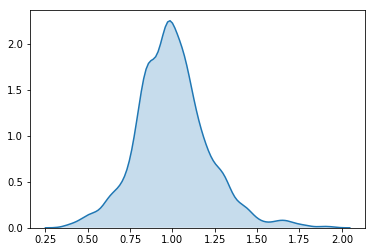

In [17]:
pooled_rpci_real = rpci_real.flatten()
sns.kdeplot(pooled_rpci_real,shade=True)


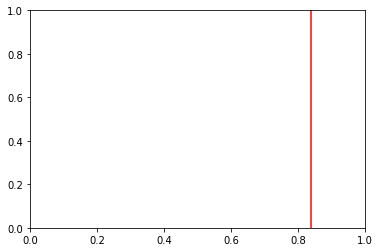

In [18]:
pooled_n = len(pooled_rpci_real)
pooled_rpci_real.sort()
plt.axvline(pooled_rpci_real[int(pooled_n * 0.2)],color="r")

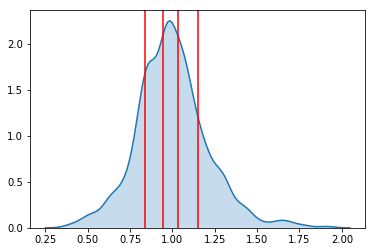

In [19]:
sns.kdeplot(pooled_rpci_real,shade=True)
plt.axvline(pooled_rpci_real[int(pooled_n * 0.2)],color="r")
plt.axvline(pooled_rpci_real[int(pooled_n * 0.4)],color="r")
plt.axvline(pooled_rpci_real[int(pooled_n * 0.6)],color="r")
plt.axvline(pooled_rpci_real[int(pooled_n * 0.8)],color="r")

In [20]:
smarkov = ps.spatial_dynamics.markov.Spatial_Markov(rpci_real.T, w, fixed = True, k = 5)

In [21]:
ps.spatial_dynamics.markov.Spatial_Markov?

Init signature: ps.spatial_dynamics.markov.Spatial_Markov(y, w, k=4, permutations=0, fixed=False, variable_name=None)
Docstring:     
Markov transitions conditioned on the value of the spatial lag.

Parameters
----------
y               : array
                  (n,t), one row per observation, one column per state of
                  each observation, with as many columns as time periods.
w               : W
                  spatial weights object.
k               : integer
                  number of classes (quantiles).
permutations    : int, optional
                  number of permutations for use in randomization based
                  inference (the default is 0).
fixed           : bool
                  If true, quantiles are taken over the entire n*t
                  pooled series. If false, quantiles are taken each
                  time period over n.
variable_name   : string
                  name of variable.

Attributes
----------
p               : matrix
             

In [22]:
smarkov.summary()

--------------------------------------------------------------
                     Spatial Markov Test                      
--------------------------------------------------------------
Number of classes: 5
Number of transitions: 3840
Number of regimes: 5
Regime names: LAG0, LAG1, LAG2, LAG3, LAG4
--------------------------------------------------------------
   Test                   LR                Chi-2
  Stat.              170.659              200.624
    DOF                   60                   60
p-value                0.000                0.000
--------------------------------------------------------------
P(H0)           C0         C1         C2         C3         C4
     C0      0.915      0.075      0.009      0.001      0.000
     C1      0.066      0.827      0.105      0.001      0.001
     C2      0.005      0.103      0.794      0.095      0.003
     C3      0.000      0.009      0.094      0.849      0.048
     C4      0.000      0.000      0.000      0.062      

Steady state distributions

In [23]:
smarkov.s

matrix([[0.17957376],
        [0.21631443],
        [0.21499942],
        [0.21134662],
        [0.17776576]])

In [24]:
smarkov.S

array([[0.43509425, 0.2635327 , 0.20363044, 0.06841983, 0.02932278],
       [0.13391287, 0.33993305, 0.25153036, 0.23343016, 0.04119356],
       [0.12124869, 0.21137444, 0.2635101 , 0.29013417, 0.1137326 ],
       [0.0776413 , 0.19748806, 0.25352636, 0.22480415, 0.24654013],
       [0.01776781, 0.19964349, 0.19009833, 0.25524697, 0.3372434 ]])

In [25]:
smarkov.F

array([[[  2.29835259,  28.95614035,  46.14285714,  80.80952381,
         279.42857143],
        [ 33.86549708,   3.79459555,  22.57142857,  57.23809524,
         255.85714286],
        [ 43.60233918,   9.73684211,   4.91085714,  34.66666667,
         233.28571429],
        [ 46.62865497,  12.76315789,   6.25714286,  14.61564626,
         198.61904762],
        [ 52.62865497,  18.76315789,  12.25714286,   6.        ,
          34.1031746 ]],

       [[  7.46754205,   9.70574606,  25.76785714,  74.53116883,
         194.23446197],
        [ 27.76691978,   2.94175577,  24.97142857,  73.73474026,
         193.4380334 ],
        [ 53.57477715,  28.48447637,   3.97566318,  48.76331169,
         168.46660482],
        [ 72.03631562,  46.94601483,  18.46153846,   4.28393653,
         119.70329314],
        [ 77.17917276,  52.08887197,  23.6043956 ,   5.14285714,
          24.27564033]],

       [[  8.24751154,   6.53333333,  18.38765432,  40.70864198,
         112.76732026],
        [ 47.3504

LISA Markov - consider the joint transitions of regions' and neighbors' income levels

* Markov state space={1(HH), 2(LH), 3(LL), 4(HL)}

In [26]:
ps.spatial_dynamics.markov.LISA_Markov?

Init signature: ps.spatial_dynamics.markov.LISA_Markov(y, w, permutations=0, significance_level=0.05, geoda_quads=False)
Docstring:     
Markov for Local Indicators of Spatial Association

Parameters
----------
y                  : array
                     (n, t), n cross-sectional units observed over t time
                     periods.
w                  : W
                     spatial weights object.
permutations       : int, optional
                     number of permutations used to determine LISA
                     significance (the default is 0).
significance_level : float, optional
                     significance level (two-sided) for filtering
                     significant LISA endpoints in a transition (the
                     default is 0.05).
geoda_quads        : bool
                     If True use GeoDa scheme: HH=1, LL=2, LH=3, HL=4.
                     If False use PySAL Scheme: HH=1, LH=2, LL=3, HL=4.
                     (the default is False).

Attribut

In [27]:
lm = ps.spatial_dynamics.markov.LISA_Markov(pci_real.T, w)
lm.classes

array([1, 2, 3, 4])

In [28]:
lm.p

matrix([[0.92985458, 0.03763901, 0.00342173, 0.02908469],
        [0.07481752, 0.85766423, 0.06569343, 0.00182482],
        [0.00333333, 0.02266667, 0.948     , 0.026     ],
        [0.04815409, 0.00160514, 0.06420546, 0.88603531]])

In [29]:
lm.steady_state

matrix([[0.28561505],
        [0.14190226],
        [0.40493672],
        [0.16754598]])

In [30]:
ps.spatial_dynamics.ergodic.fmpt(lm.p)

matrix([[ 3.50121609, 37.93025465, 40.55772829, 43.17412009],
        [31.72800152,  7.04710419, 28.68182751, 49.91485137],
        [52.44489385, 47.42097495,  2.46952168, 43.75609676],
        [38.76794022, 51.51755827, 26.31568558,  5.96851095]])

In [31]:
lm.chi_2

(238.16387702642578, 0.0, 9)